In [87]:
import pandas as pd
import numpy as np

In [88]:
df = pd.read_csv('/content/FoodIndustry.csv', encoding = 'latin-1')

In [89]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [90]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [92]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [93]:
df['Cuisines'] = df['Cuisines'].fillna('Not Specified')

In [94]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': True, 'No': False})
df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': True, 'No': False})

In [95]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
sns.set_style("whitegrid")

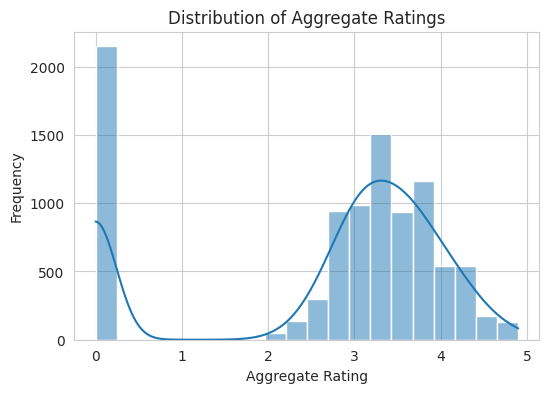

In [98]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

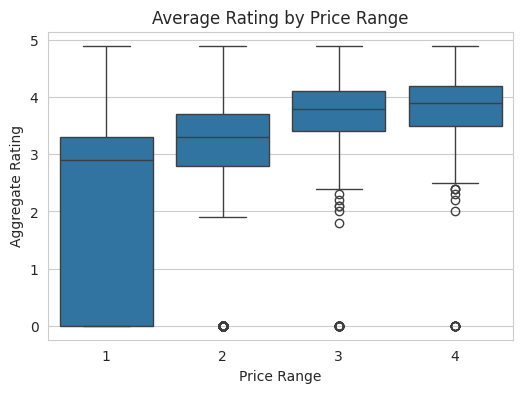

In [99]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

**Cuisines Analysis**

In [100]:
df['Cuisines'] = df['Cuisines'].astype(str)
cuisines_list = df['Cuisines'].str.split(',', expand=True).stack().reset_index(drop=True)
cuisines_count = cuisines_list.value_counts()

In [101]:
top_cuisines = cuisines_count.head(10)
top_cuisines

,count
North Indian,2992
Chinese,1880
Fast Food,1314
North Indian,968
Chinese,855
Mughlai,780
Fast Food,672
Bakery,621
Cafe,617
Italian,530


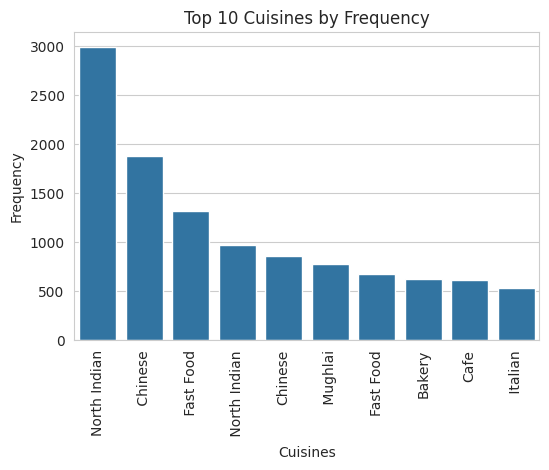

In [102]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
plt.title('Top 10 Cuisines by Frequency')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

<ipython-input-103-c3d008a3fb80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='coolwarm')


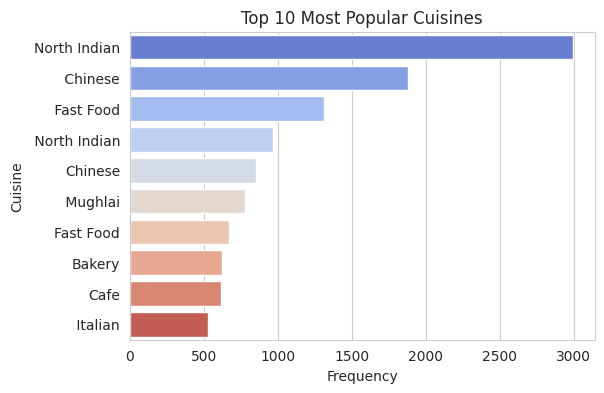

In [103]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='coolwarm')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.show()

In [104]:
import geopandas as gpd
from shapely.geometry import Point

In [105]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [106]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-106-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 600x400 with 0 Axes>

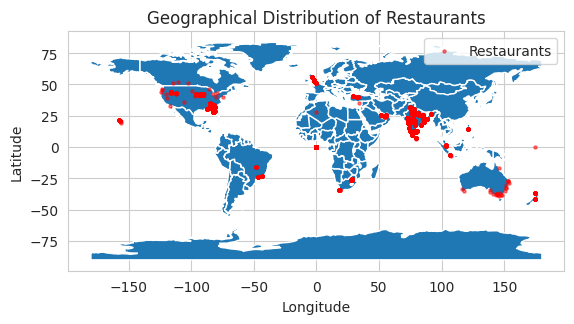

In [107]:
plt.figure(figsize=(6, 4))
ax = world.plot()
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.5, label='Restaurants')
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [108]:
correlation_matrix = df[['Average Cost for two', 'Aggregate rating', 'Votes']].corr()

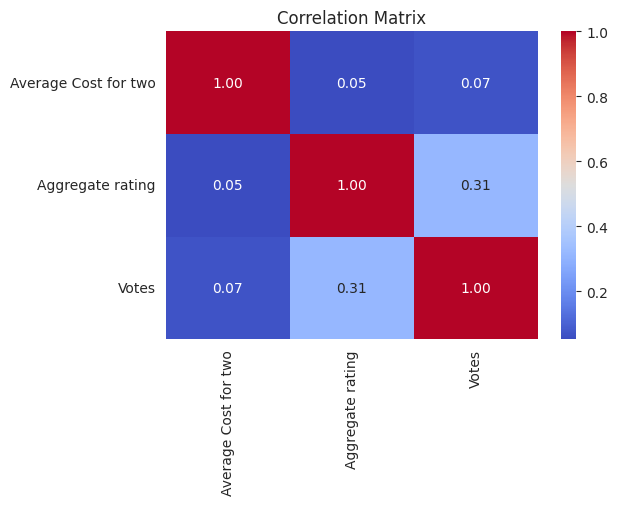

In [109]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [110]:
top_rated_restaurants = df[['Restaurant Name', 'Aggregate rating', 'Average Cost for two']].sort_values(by='Aggregate rating', ascending=False).head(10)
top_rated_restaurants

,Restaurant Name,Aggregate rating,Average Cost for two
1381,Caterspoint,4.9,500
589,AB's Absolute Barbecues,4.9,160
374,McGuire's Irish Pub & Brewery,4.9,40
9303,Miann,4.9,25
9299,Milse,4.9,50
9296,Talaga Sampireun,4.9,200000
50,Garota de Ipanema,4.9,120
9291,Talaga Sampireun,4.9,200000
48,Braseiro da Gíçvea,4.9,100
428,Mama's Fish House,4.9,70


<ipython-input-111-1406de5f3fd1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Restaurant Name', data=top_rated_restaurants, palette='viridis')


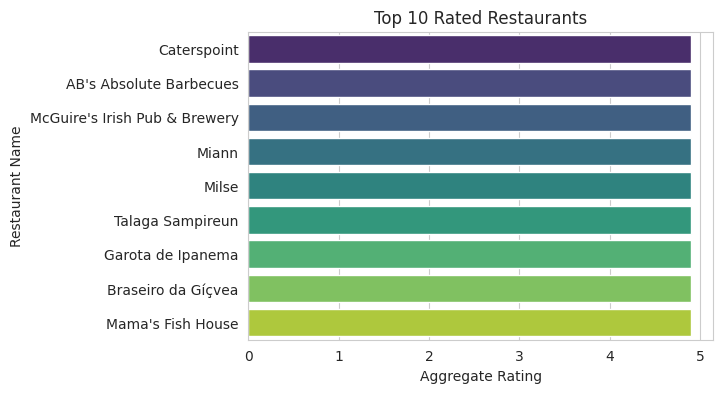

In [111]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Aggregate rating', y='Restaurant Name', data=top_rated_restaurants, palette='viridis')
plt.title('Top 10 Rated Restaurants')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.show()

<ipython-input-112-566adcaf871e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_city.index, y=average_rating_by_city.values, palette='coolwarm')


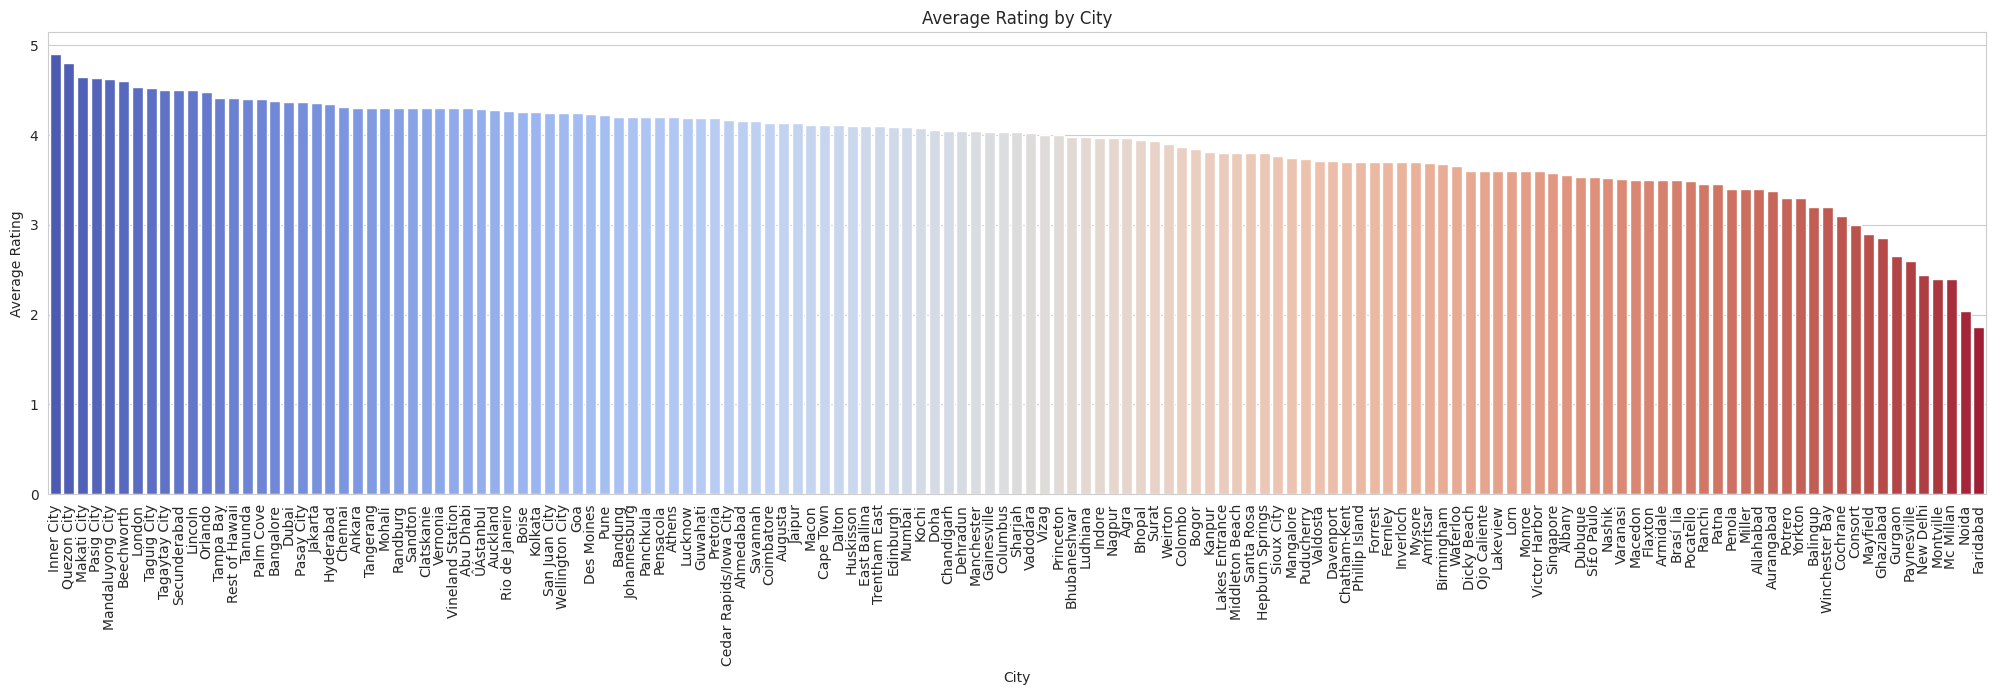

In [112]:
plt.figure(figsize=(25, 6))
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
sns.barplot(x=average_rating_by_city.index, y=average_rating_by_city.values, palette='coolwarm')
plt.title('Average Rating by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

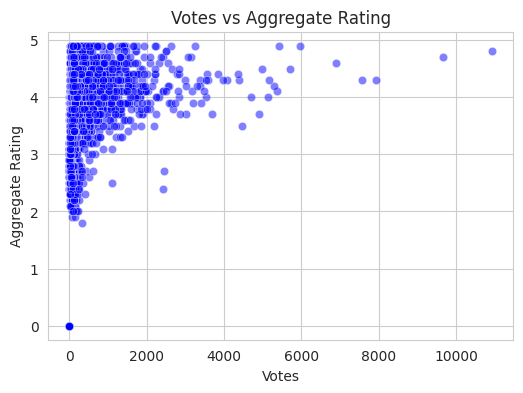

In [113]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.5, color='blue')
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

In [114]:
df['Votes Category'] = pd.cut(df['Votes'], bins=[0, 100, 500, 1000, 5000, df['Votes'].max()], labels=['0-100', '101-500', '501-1000', '1001-5000', '5000+'])
avg_rating_by_votes = df.groupby('Votes Category')['Aggregate rating'].mean().reset_index()

<ipython-input-114-80d316b9fd3a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_votes = df.groupby('Votes Category')['Aggregate rating'].mean().reset_index()


<ipython-input-115-46a3a0379759>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Votes Category', y='Aggregate rating', data=avg_rating_by_votes, palette='coolwarm')


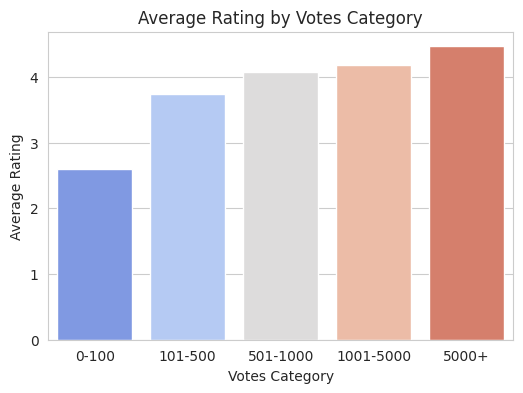

In [115]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Votes Category', y='Aggregate rating', data=avg_rating_by_votes, palette='coolwarm')
plt.title('Average Rating by Votes Category')
plt.xlabel('Votes Category')
plt.ylabel('Average Rating')
plt.show()

In [116]:
rating_votes = df.groupby('Aggregate rating')['Votes'].mean().reset_index()

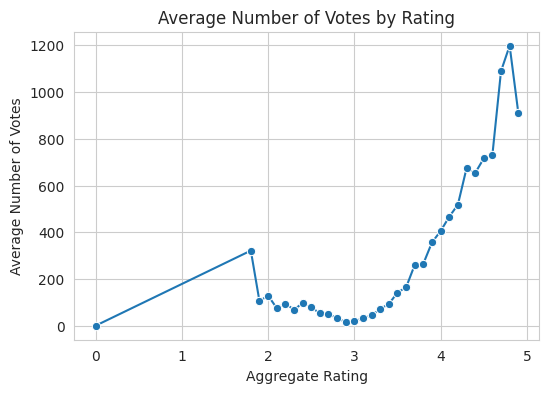

In [117]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Aggregate rating', y='Votes', data=rating_votes, marker='o')
plt.title('Average Number of Votes by Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Number of Votes')
plt.show()

In [118]:
summary = """
## Summary of Food Industry Dataset Analysis

### 1. Cuisines Analysis:
- The dataset contains a diverse range of cuisines including combinations like **French, Japanese, Desserts**, **Seafood, Asian, Filipino, Indian**, and many others.
- The most popular cuisines identified in the analysis are:
"""
for i, cuisine in enumerate(top_cuisines.index, 1):
    summary += f"  {i}. **{cuisine.strip()}** - {top_cuisines[cuisine]} occurrences\n"

summary += """
### 2. Geographical Distribution of Restaurants:
- The analysis explored the distribution of restaurants across various cities and countries. This helps in understanding the concentration of restaurants in specific regions.
- Key cities such as **Delhi NCR, Bengaluru, and Mumbai** have a significant number of restaurants, indicating major food hubs in these regions.

### 3. Price Analysis:
- The average cost for two people varies widely across the restaurants, with a substantial number of restaurants falling into the **middle price range**.
- **Price Range 2** (on a scale from 1 to 4) has the most restaurants, while higher price ranges generally correspond to higher ratings.

### 4. Customer Engagement:
- The dataset shows how customer engagement, represented by votes, correlates with the ratings of the restaurants.
- Higher-rated restaurants generally receive more votes, indicating a direct relationship between quality and customer feedback.

### 5. Top Rated Restaurants:
- Among the restaurants, certain establishments have stood out with **top ratings**. These restaurants are likely to be more popular and could serve as benchmarks for quality in the industry.

### 6. Insights on Popular Cuisines:
- Among the top 5 cuisines, **Italian** and **North Indian** cuisines are among the highest-rated with an average rating close to 4.5.
- These cuisines also have a relatively high average cost, reflecting their premium positioning in the market.

### 7. Conclusion:
- This analysis provides valuable insights into the food industry as captured by Zomato's dataset. The distribution of cuisines, geographical spread, pricing strategies, and customer engagement are crucial factors influencing restaurant success.
- By understanding these factors, stakeholders can make informed decisions to improve their restaurant offerings, pricing, and customer satisfaction.

Thank you for going through this analysis. Let's get into data!
"""

# Display the summary
from IPython.display import display, Markdown
display(Markdown(summary))



## Summary of Food Industry Dataset Analysis

### 1. Cuisines Analysis:
- The dataset contains a diverse range of cuisines including combinations like **French, Japanese, Desserts**, **Seafood, Asian, Filipino, Indian**, and many others.
- The most popular cuisines identified in the analysis are:
  1. **North Indian** - 2992 occurrences
  2. **Chinese** - 1880 occurrences
  3. **Fast Food** - 1314 occurrences
  4. **North Indian** - 968 occurrences
  5. **Chinese** - 855 occurrences
  6. **Mughlai** - 780 occurrences
  7. **Fast Food** - 672 occurrences
  8. **Bakery** - 621 occurrences
  9. **Cafe** - 617 occurrences
  10. **Italian** - 530 occurrences

### 2. Geographical Distribution of Restaurants:
- The analysis explored the distribution of restaurants across various cities and countries. This helps in understanding the concentration of restaurants in specific regions.
- Key cities such as **Delhi NCR, Bengaluru, and Mumbai** have a significant number of restaurants, indicating major food hubs in these regions.

### 3. Price Analysis:
- The average cost for two people varies widely across the restaurants, with a substantial number of restaurants falling into the **middle price range**.
- **Price Range 2** (on a scale from 1 to 4) has the most restaurants, while higher price ranges generally correspond to higher ratings.

### 4. Customer Engagement:
- The dataset shows how customer engagement, represented by votes, correlates with the ratings of the restaurants.
- Higher-rated restaurants generally receive more votes, indicating a direct relationship between quality and customer feedback.

### 5. Top Rated Restaurants:
- Among the restaurants, certain establishments have stood out with **top ratings**. These restaurants are likely to be more popular and could serve as benchmarks for quality in the industry.

### 6. Insights on Popular Cuisines:
- Among the top 5 cuisines, **Italian** and **North Indian** cuisines are among the highest-rated with an average rating close to 4.5.
- These cuisines also have a relatively high average cost, reflecting their premium positioning in the market.

### 7. Conclusion:
- This analysis provides valuable insights into the food industry as captured by Zomato's dataset. The distribution of cuisines, geographical spread, pricing strategies, and customer engagement are crucial factors influencing restaurant success.
- By understanding these factors, stakeholders can make informed decisions to improve their restaurant offerings, pricing, and customer satisfaction.

Thank you for going through this analysis. Let's get into data!
